# Project 3: Group 1: Lending Project

### Group Members:

In [5]:
print ("Jessica Lozano")
print ("Joeseph Perri")
print ("Marc Tabin") 
print ("Nesreen El-Rayes")

Jessica Lozano
Joeseph Perri
Marc Tabin
Nesreen El-Rayes


#### Tasks:
Add table of contents with links to blocks
Refrences

## Objective:

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
loans = pd.read_csv('accepted-200000.csv')

# Data Description

In [6]:
# Try to export to word file 
myfile=open("LCDataDictionary.txt") 
txt = myfile.read()
print(txt)

BrowseNotesFile	Description:
acceptD 			The date which the borrower accepted� the offer				
accNowDelinq			The number of accounts on which the borrower is now delinquent.				
accOpenPast24Mths		Number of trades opened in past 24 months.				
addrState	 		The state provided by the borrower in the loan application				
all_util			Balance to credit limit on all trades				
annual_inc_joint		The combined self-reported annual income provided by the co-borrowers during registration				
annualInc			The self-reported annual income provided by the borrower during registration.				
application_type		Indicates whether the loan is an individual application or a joint application with two co-borrowers				
avg_cur_bal			Average current balance of all accounts				
bcOpenToBuy			Total open to buy on revolving bankcards.				
bcUtil				Ratio of total current balance to high credit/credit limit for all bankcard accounts.				
chargeoff_within_12_mths	Number of charge-offs within 12 months				
collections_12_

# Data Cleaning

https://www.kaggle.com/jw3570/p2p-lending-club-data-analysis

In [130]:
print(loans.isnull().sum(axis=0))

id                                                 0
member_id                                     199999
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       9930
emp_length                                      9914
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

print (loans.shape)


#clean_loans=loans.dropna()
#print (clean_loans.shape)

# delete the rows that have more than 100 cells blank
clean_rows=loans.dropna(axis='rows', thresh= 93)
print (clean_rows.shape)

clean_loans=clean_rows.dropna(axis='columns', thresh=1800)
print (clean_loans.shape)

print(clean_loans.head())

#clean_loans=loans.dropna(axis='rows')
#print (clean_loans.shape)

#Group 1:
# remove the cells with null values
#loans['loan_status'].value_counts(dropna=False)
# Normalize data
# loans['loan_status'].value_counts(normalize=True, dropna=False)



In [160]:
print (loans.shape)

# clean the columns that have cells with 190 K missing cells or more
clean_cols=loans.dropna(axis='columns', thresh=190000)
print (clean_cols.shape)


# delete the rows that have more than 92 cells blank
clean_loans=clean_cols.dropna(axis='rows', thresh= 92)


print(clean_loans.shape)



(199999, 151)
(199999, 92)
(176820, 92)


In [161]:
clean_loan_status = clean_loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]
print(clean_loan_status.shape)

# we removed anyone who is late but within 120 frame


(154174, 92)


In [154]:
print(clean_loan_status.isnull().sum(axis=0))
print clean_loan_status.columns

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_bal                   0
                             ..
chargeof

Based on the previous step, after using threshold to drop columns with 95% or  more data points missing, and then dropping the rows that have 100% values missing. The Dataframe was reduced from  (199999, 151)to (1...., 92).

Next, we elimintaed the features that doesnot reveal any meaning, like ID, Zip code...etc. The selection of attributes was selected by consensus.

In [163]:
final_loans=clean_loan_status.drop(['id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','url','title','initial_list_status','pymnt_plan','policy_code','application_type','earliest_cr_line','last_credit_pull_d' ,'addr_state','hardship_flag','disbursement_method','debt_settlement_flag'],axis=1)

print final_loans.shape
print final_loans.columns
print final_loans.head
print final_loans.describe

(154174, 62)
Index([u'loan_amnt', u'term', u'int_rate', u'installment', u'grade',
       u'emp_length', u'home_ownership', u'annual_inc', u'verification_status',
       u'loan_status', u'purpose', u'dti', u'delinq_2yrs', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'open_acc', u'pub_rec',
       u'revol_bal', u'revol_util', u'total_acc', u'last_fico_range_high',
       u'last_fico_range_low', u'collections_12_mths_ex_med',
       u'acc_now_delinq', u'tot_coll_amt', u'tot_cur_bal', u'total_rev_hi_lim',
       u'acc_open_past_24mths', u'avg_cur_bal', u'bc_open_to_buy', u'bc_util',
       u'chargeoff_within_12_mths', u'delinq_amnt', u'mo_sin_old_il_acct',
       u'mo_sin_old_rev_tl_op', u'mo_sin_rcnt_rev_tl_op', u'mo_sin_rcnt_tl',
       u'mort_acc', u'mths_since_recent_bc', u'num_accts_ever_120_pd',
       u'num_actv_bc_tl', u'num_actv_rev_tl', u'num_bc_sats', u'num_bc_tl',
       u'num_il_tl', u'num_op_rev_tl', u'num_rev_accts',
       u'num_rev_tl_bal_gt_0', u'num_

<bound method DataFrame.describe of         loan_amnt        term  int_rate  installment grade emp_length  \
0           15000   60 months     12.39       336.64     C  10+ years   
1           10400   36 months      6.99       321.08     A    8 years   
2           21425   60 months     15.59       516.36     D    6 years   
4            7650   36 months     13.66       260.20     C   < 1 year   
5            9600   36 months     13.66       326.53     C  10+ years   
6            2500   36 months     11.99        83.03     B   < 1 year   
7           16000   60 months     11.44       351.40     B    6 years   
8           23325   36 months     14.31       800.71     C  10+ years   
9            5250   36 months     11.44       172.98     B    2 years   
10          10000   36 months     11.99       332.10     B    8 years   
11          12975   36 months     17.86       468.17     D  10+ years   
12          17000   36 months     13.66       578.22     C  10+ years   
14           60

**Group 1: used records for fully paid and charged off, they dropped the rows with 30% or more of the cells missing and then selected the columns that may be interesting for the investor.
Loan Status:
Fully Paid            
Charged Off            
Current               
Late (31-120 days)      
In Grace Period          
Late (16-30 days)        
Default    

loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

Normalize the selected cols
loans['loan_status'].value_counts(normalize=True, dropna=False)

# Visualization

1) Add a chart that shows the distribution of Loan Amount (Histogram)
2) Add Pair plot to understand the nature of the data
3) Add chart for purpose for loan (My2PY group created descriptive stats table that looks good), their histogram is colored and looks good too, pub_rec_bankruptcies

C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Interest rate by Loan Status')

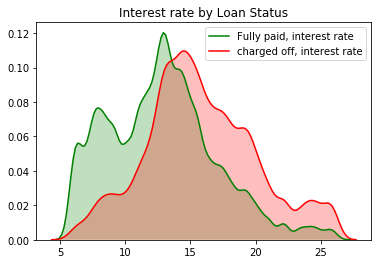

In [87]:
##### used data before cleaning until we decide:

loan_status_fullypaid= loans[loans['loan_status']=='Fully Paid']
loan_status_chargedoff = loans[loans['loan_status']=='Charged Off']

sns.kdeplot(loan_status_fullypaid['int_rate'], label="Fully paid, interest rate",shade=True, color="g")
sns.kdeplot(loan_status_chargedoff['int_rate'], label="charged off, interest rate",shade=True,color="r")
plt.title('Interest rate by Loan Status')





loan_status_fullypaid= loans[loans['loan_status']=='Fully Paid']
loan_status_chargedoff = loans[loans['loan_status']=='Charged Off']

sns.kdeplot(loan_status_fullypaid['int_rate'], label="Fully paid, interest rate",shade=True, color="g")
sns.kdeplot(loan_status_chargedoff['int_rate'], label="charged off, interest rate",shade=True,color="r")
plt.title('Interest rate by Loan Status')

# Data Coding-Dummies

In [172]:
# Get Dummies

df = pd.get_dummies(final_loans, columns=['emp_length','home_ownership','purpose','grade','verification_status'])

names =[col for col in df.columns if col not in ['emp_length','home_ownership','loan_status', 'purpose','grade','verification_status']]

# X and Y will be the new Independent and Dependant variables after excluding the variables
# listed in the description above:
        

X_dummies = df[names]
y_dummies = np.where(df['loan_status']=="Fully Paid", 1, 0)


print X_dummies
print y_dummies

        loan_amnt        term  int_rate  installment  annual_inc    dti  \
0           15000   60 months     12.39       336.64     78000.0  12.03   
1           10400   36 months      6.99       321.08     58000.0  14.92   
2           21425   60 months     15.59       516.36     63800.0  18.49   
4            7650   36 months     13.66       260.20     50000.0  34.81   
5            9600   36 months     13.66       326.53     69000.0  25.81   
6            2500   36 months     11.99        83.03     89000.0  13.77   
7           16000   60 months     11.44       351.40    109777.0  11.63   
8           23325   36 months     14.31       800.71     72000.0  27.03   
9            5250   36 months     11.44       172.98     26000.0  14.36   
10          10000   36 months     11.99       332.10     90000.0   8.44   
11          12975   36 months     17.86       468.17     60000.0  22.42   
12          17000   36 months     13.66       578.22     75000.0  23.63   
14           6000   36 mo

# Feature selection 

Group 1: They selected features manully, not a good method, we can use lasso and it is more efficient

# Questions

****Done*** 1) In Loan staus, what is the meaning of charged off? Ans: Charged off is hopeless case, a person who did not pay for 120 months


2) what is subgrade attribute, description is not clear?



3) After checking the first 100K, there are only Graduate students, no undergraduate. Which means this segment is not in the data that we have.


4) None of the reasons have "study loan"


5) I couldnot find loan application to check features like group 2 did?


# Ideas Marketing Plan

1) only 35 had payement plan, that could be an improvement from business perspective. A plan must be set and signed
2) Set a minimum timeframe for declined borrowers before they can re-apply, that will save processing and operations time. and also will help focus on borrowers with high likelyhood of paying back. Students are exluded from this section

Findingd from other groups:
-----------------------------------------
Group 1:
-------------
1) when the interest rate descrease, the % of borrowers who fully pay back increase.
2) Group one did visualization for the majority of the features in a boring way. Many charts are useless
3) dummy variable was used for loan status.
4) Train, test split was based on the month the loan was provided, in our case if we use 10 folds cross validation then that is not required.
5) No modeles posted after the split!

Group 2
------------
1) Kept the features in Loan application, they got the application from Lending club website
2) Used linear regression for loan status and selected the top 20 predictors and bottom 20 predictors
3) Used also NN (auc= .727), and cross validatoin (.71)


Lending Club:
--------------------
1) They have personal loan, business, Auto, Patient, the interest rate change accordingly




My 2 Py:
--------------------
1) Use Home owner as a separator feature